In [3]:
# Import required libraries 
import numpy as np 
import pandas as pd 

# Import the dataset 
dataset = pd.read_csv('TelecomChurn.csv')
dataset.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
dataset.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:
dataset['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [21]:
print(dataset.groupby('churn')['customer service calls'].mean())

churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64


In [29]:
print(dataset.groupby('churn')['state'].value_counts())

churn  state
False  WV       96
       AL       72
       VA       72
       WI       71
       MN       69
                ..
True   AZ        4
       LA        4
       AK        3
       HI        3
       IA        3
Name: count, Length: 102, dtype: int64


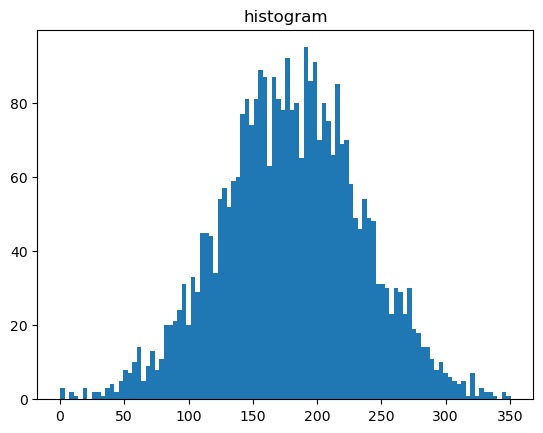

In [45]:
# Import matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Visualize the distribution of 'Total day minutes' 
plt.hist(dataset['total day minutes'], bins = 100) 
plt.title('histogram')
# Display the plot 
plt.show() 


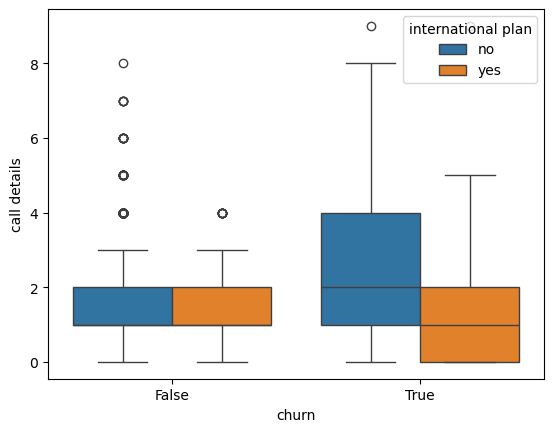

In [51]:
# To visualize the difference in Customer service calls between churners and non-churners
sns.boxplot(x = 'churn', 
			y = 'customer service calls', 
			data = dataset, 				 
			hue = "international plan") 
# Display the plot 
plt.xlabel('churn')
plt.ylabel('call details')
plt.show() 


In [63]:
# Features and Labels 
X = dataset.iloc[:, 0:19].values 
y = dataset.iloc[:, 19].values # Churn 

# Encoding categorical data in X 
from sklearn.preprocessing import LabelEncoder 

labelencoder_X_1 = LabelEncoder() 
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3]) 

labelencoder_X_2 = LabelEncoder() 
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4]) 

# Encoding categorical data in y 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 



In [65]:
# Removing extra column to avoid dummy variable trap 
X_State = pd.get_dummies(X[:, 0], drop_first = True) 

# Converting X to a dataframe 
X = pd.DataFrame(X) 

# Dropping the 'State' column 
X = X.drop([0], axis = 1) 

# Merging two dataframes 
frames = [X_State, X] 
result = pd.concat(frames, axis = 1, ignore_index = True) 

# Final dataset with all numeric features 
X = result 


In [84]:
# Splitting the dataset into the Training and Test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
													test_size = 0.2, 
													random_state = 0) 


In [86]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Instantiate the classifier 
clf = RandomForestClassifier() 

# Fit to the training data 
clf.fit(X_train, y_train) 


ValueError: could not convert string to float: 'no'

In [88]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Compute accuracy 
from sklearn.metrics import accuracy_score 

accuracy_score(y_test, y_pred) 


In [69]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 


NameError: name 'y_test' is not defined